In [1]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sms



# Data Science Career Track
- Capstone Two: Exploratory Data Analysis
    - Overview
- Now that you’ve obtained, cleaned, and wrangled your dataset into a form that's ready for analysis, it’s time to perform exploratory data analysis (EDA). Use the outline below as a reminder of what steps to follow. Keep in mind that the goal of the EDA work is to get familiar with the features in your dataset, investigate the relationships between features, and generally understand the core characteristics of your dataset. Be creative and think about interesting figures and plots you can create to help deepen your understanding of the data.



You can also review the EDA work you did for the guided capstone, the DSM Medium
article. And the EDA cheatsheet pdf for reference.
Project Steps
Estimated Time: 6-10 Hours
All of the following steps should be completed in a Jupyter notebook. Please provide
adequate notation and structure so that your mentor can better understand the work
you’ve done.
Goal: Explore the data relationships of all your features and understand how the
features compare to the response variable.
● Build data profiles and tables
○ Inferential statistics
● Explore data relationships
○ Data visualization
● Feature Selection and Engineering
Inferential Statistics Hint: do any particular results in your data strike you as abnormal?
What hypotheses can you form (Null and Alternative hypotheses) which you could go on
to test? Take some time to recall your statistical concepts, such as that the p-value of an
observation is the probability of seeing data at least as extreme as that observation, on
the assumption of the null hypothesis.
Data Visualization Hint: recall your matplotlib and seaborn functions for data
visualization: matplotlib:
- plt.plot()
- plt.xlabel()
- plt.show()
- plt.hist(),
Seaborn:
- sns.relplot()
- sns.lmplot()
- sns.catplot().
Remember to always start with an idea of what you want to achieve, and use these
libraries and their functions as your toolkit to make that idea a reality.
Feature Selection and Engineering Hint: feature selection is where data storytelling starts:
we tell a story as soon as we include certain features and omit others. But how we
manipulate - or engineer - those fields is just as important. Recall the crucial elements to
feature engineering:
- If you have categorical features, you might need to one-hot encode them
- You may need to binarize your columns and bin your values.
- To handle missing data, think about how appropriate the methods of listwise
deletion, data imputation, replacing missing values with constants or simply
attempting to find the missing values are for your data.
- Think about whether you need to standardize, log-transform or normalize your
data, as well as statistically valid ways to remove outliers.
Consider the following questions and use your understanding of your dataset to answer
them:
● Are there variables that are particularly significant in terms of explaining the
answer to your project question?
● Are there significant differences between subgroups in your data that may be
relevant to your project aim?
● Are there strong correlations between pairs of independent variables or between
an independent and a dependent variable?
● What are the most appropriate tests to use to analyze these relationships?
Student Examples
Get some inspiration from these student examples:
Example 1: School Shooter Investigation - Tyler Schmalz
Example 2: Sports team performance - Rob Chudzik

In [2]:
df = pd.read_csv('denver_crime_clean.csv',index_col=0,parse_dates=['date','reported'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470278 entries, 0 to 470277
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   crime_type      470278 non-null  object        
 1   crime_category  470278 non-null  object        
 2   date            470278 non-null  datetime64[ns]
 3   reported        470278 non-null  datetime64[ns]
 4   address         432413 non-null  object        
 5   y_lon           466246 non-null  float64       
 6   x_lat           466246 non-null  float64       
 7   neighborhood    470277 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 32.3+ MB


In [ ]:
# Lets start splitting up the dataframe into the different crime categories
types = list(crime_df['crime_category'].unique())
types

In [ ]:
public_disorder = crime_df.loc[crime_df['crime_category']=='public-disorder']
drug_alcohol = crime_df.loc[crime_df['crime_category']=='drug-alcohol']
all_other_crimes = crime_df.loc[crime_df['crime_category']=='all-other-crimes']
traffic_accident = crime_df.loc[crime_df['crime_category']=='traffic-accident']
robbery = crime_df.loc[crime_df['crime_category']=='robbery']
other_crimes_against_persons = crime_df.loc[crime_df['crime_category']=='other-crimes-against-persons']
aggravated_assault = crime_df.loc[crime_df['crime_category']=='aggravated-assault']
arson = crime_df.loc[crime_df['crime_category']=='arson']
burglary = crime_df.loc[crime_df['crime_category']=='burlary']
larceny = crime_df.loc[crime_df['crime_category']=='larceny']
theft_from_car = crime_df.loc[crime_df['crime_category']=='theft-from-motor-vehicle']
auto_theft = crime_df.loc[crime_df['crime_category']=='auto-theft']
white_collar_crime = crime_df.loc[crime_df['crime_category']=='white-collar-crime']
murder = crime_df.loc[crime_df['crime_category']=='murder']

In [ ]:
subsets = [public_disorder,drug_alcohol,all_other_crimes,
          traffic_accident,robbery,other_crimes_against_persons,aggravated_assault,
          arson,burglary,larceny,theft_from_car,
         auto_theft,white_collar_crime,murder]

In [ ]:
null_data = crime_df[crime_df.isnull().any(axis=1)]
null_data.crime_category.value_counts()

#### EDA
lets make a pre-covid and post covid dataset

In [3]:
pre_df = df[df.date < '2020-03-01']
post_df = df[df.date >= '2020-03-01']



KeyError: 'Column not found: False'

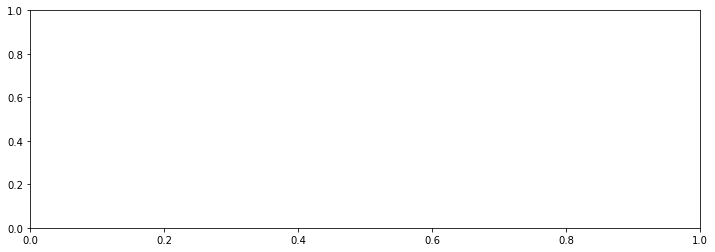

In [5]:
fig, axs = plt.subplots(figsize=(12, 4))
post_df.groupby(post_df['date'].dt.month)['crime_category'].count().plot(
    kind='bar',rot=0,ax=axs
)
plt.xlabel('months');
plt.ylabel('crimes during time period')
plt.title('crimes by month')

In [38]:
# quick glance at the most common crimes in Denver
crime_df['crime_category'].value_counts(normalize=True) * 100

traffic-accident                22.916229
all-other-crimes                15.960030
theft-from-motor-vehicle        10.672478
public-disorder                 10.642236
larceny                         10.635373
auto-theft                       8.547848
burglary                         5.199830
drug-alcohol                     4.853661
other-crimes-against-persons     4.717681
aggravated-assault               2.928068
robbery                          1.357009
white-collar-crime               1.333416
arson                            0.154425
murder                           0.081717
Name: crime_category, dtype: float64

In [39]:
# Now lets do something fun. Lets take a look at only the arson data 
arson.head()

NameError: name 'arson' is not defined

In [ ]:
arson['crime_type'].value_counts(normalize=True) * 100

In [ ]:
# Create `locations` by subsetting only Latitude and Longitude from the dataset 
locations = arson[['x_lat','y_lon']]

# Create `location_list` by transforming the DataFrame to list of lists 
location_list = locations.values.tolist()



In [ ]:
# Plot the data on map (map location is provided) using folium and for loop for plotting all the points
import folium

map = folium.Map(location=[39.7392,-104.9903], tiles='openstreetmap', zoom_start=11)
for point in range(0, len(location_list)):
    folium.CircleMarker(location_list[point], radius=3, color='red', fill=True, fill_color='red', opacity = 0.4).add_to(map)
map

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
arson.groupby(arson['date'].dt.hour)['crime_category'].count().plot(
    kind='bar',rot=0,ax=axs
)
plt.xlabel('hour of the day');
plt.ylabel('Arsons by the hour')

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
arson.groupby(arson['date'].dt.month)['crime_category'].count().plot(
    kind='bar',rot=0,ax=axs
)
plt.xlabel('months');
plt.ylabel('crimes during time period')
plt.title('Arsons by Month')

In [ ]:
#apparently most murders happen in september

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
murder.groupby(murder['date'].dt.year)['crime_category'].count().plot(
    kind='bar',rot=0,ax=axs
)
plt.xlabel('months');
plt.ylabel('crimes during time period')
plt.title('Arsons by year')

In [ ]:



df = pd.merge(crime_df,neighbor_equity_index_df[['neighborhood','OVERALLEQUITY_SCORE']],on='neighborhood', how='left')
# df = pd.merge(df,df2[['Key_Column','Target_Column']],on='Key_Column', how='left')


In [ ]:
crime_df.to_csv('denver_crime_clean.csv')

In [ ]:
# quick glance at the most common crimes in Denver
crime_df['crime_category'].value_counts(normalize=True) * 100

# Now lets do something fun. Lets take a look at only the arson data 
arson.head()

arson['crime_type'].value_counts(normalize=True) * 100

# Create `locations` by subsetting only Latitude and Longitude from the dataset 
locations = arson[['x_lat','y_lon']]

# Create `location_list` by transforming the DataFrame to list of lists 
location_list = locations.values.tolist()



# Plot the data on map (map location is provided) using folium and for loop for plotting all the points
import folium

map = folium.Map(location=[39.7392,-104.9903], tiles='openstreetmap', zoom_start=11)
for point in range(0, len(location_list)):
    folium.CircleMarker(location_list[point], radius=3, color='red', fill=True, fill_color='red', opacity = 0.4).add_to(map)
map

fig, axs = plt.subplots(figsize=(12, 4))
arson.groupby(arson['date'].dt.hour)['crime_category'].count().plot(
    kind='bar',rot=0,ax=axs
)
plt.xlabel('hour of the day');
plt.ylabel('Arsons by the hour')

fig, axs = plt.subplots(figsize=(12, 4))
arson.groupby(arson['date'].dt.month)['crime_category'].count().plot(
    kind='bar',rot=0,ax=axs
)
plt.xlabel('months');
plt.ylabel('crimes during time period')
plt.title('Arsons by Month')

#apparently most murders happen in september

fig, axs = plt.subplots(figsize=(12, 4))
murder.groupby(murder['date'].dt.year)['crime_category'].count().plot(
    kind='bar',rot=0,ax=axs
)
plt.xlabel('months');
plt.ylabel('crimes during time period')
plt.title('Arsons by year')









public_disorder = crime_df.loc[crime_df['crime_category']=='public-disorder']
drug_alcohol = crime_df.loc[crime_df['crime_category']=='drug-alcohol']
sexual_assault = crime_df.loc[crime_df['crime_category']=='sexual-assault']
all_other_crimes = crime_df.loc[crime_df['crime_category']=='all-other-crimes']
traffic_accident = crime_df.loc[crime_df['crime_category']=='traffic-accident']
robbery = crime_df.loc[crime_df['crime_category']=='robbery']
other_crimes_against_persons = crime_df.loc[crime_df['crime_category']=='other-crimes-against-persons']
aggravated_assault = crime_df.loc[crime_df['crime_category']=='aggravated-assault']
arson = crime_df.loc[crime_df['crime_category']=='arson']
burglary = crime_df.loc[crime_df['crime_category']=='burlary']
larceny = crime_df.loc[crime_df['crime_category']=='larceny']
theft_from_car = crime_df.loc[crime_df['crime_category']=='theft-from-motor-vehicle']
auto_theft = crime_df.loc[crime_df['crime_category']=='auto-theft']
white_collar_crime = crime_df.loc[crime_df['crime_category']=='white-collar-crime']
murder = crime_df.loc[crime_df['crime_category']=='murder']

subsets = [public_disorder,drug_alcohol,sexual_assault,all_other_crimes,
          traffic_accident,robbery,other_crimes_against_persons,aggravated_assault,
          arson,burglary,larceny,theft_from_car,
         auto_theft,white_collar_crime,murder]

# Lets start splitting up the dataframe into the different crime categories
types = list(crime_df['crime_category'].unique())
types
















df = pd.merge(crime_df,neighbor_equity_index_df[['neighborhood','OVERALLEQUITY_SCORE']],on='neighborhood', how='left')
# df = pd.merge(df,df2[['Key_Column','Target_Column']],on='Key_Column', how='left')


crime_df.to_csv('denver_crime_clean.csv')